# Задание

- Выбрать набор данных (датасет);
- Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:
    - История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
    - На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
    - Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
    - Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
    - История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.

# Подключение библиотек

In [1]:
%pip install pandas
%pip install numpy
%pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ход работы
## Выбор и описание датасета
- Этот набор данных содержит информацию о взаимодействии с клиентами, продажах и возможностях из системы CRM (Customer Relationship Management) вымышленной компании. 
- В рамках данной работы изучим таблицу этого датасета, содержащую информацию о клиентах - юридических лицах. Имеются следующие атрибуты:
    - account. Название клиента;
    - sector. Сектор работы;
    - year_established. Год основания компании;
    - revenue. Выручка;
    - employees. Кол-во сотрудников;
    - office_location. Страна размещения офиса;
    - subsidiary_of. Если является дочерней компаний, то здесь указывается родительская.

In [3]:
# Импорт датасета
df = pd.read_csv('accounts.csv')

# Вывод первых 5 строк
df.head(5)

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN
1,Betasoloin,medical,1999,251.41,495,United States,NaN
2,Betatech,medical,1986,647.18,1185,Kenya,NaN
3,Bioholding,medical,2012,587.34,1356,Philipines,NaN
4,Bioplex,medical,1991,326.82,1016,United States,NaN


## Создание истории о данных
### Сектора работы клиентов
Ниже представлен вариант с круговой диаграммой.

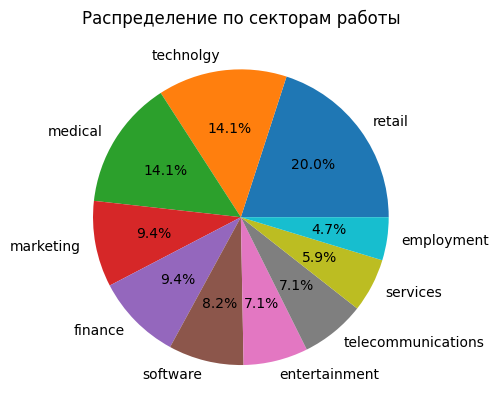

In [4]:
sector_counts = df['sector'].value_counts()
plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%')
plt.title('Распределение по секторам работы')
plt.show()

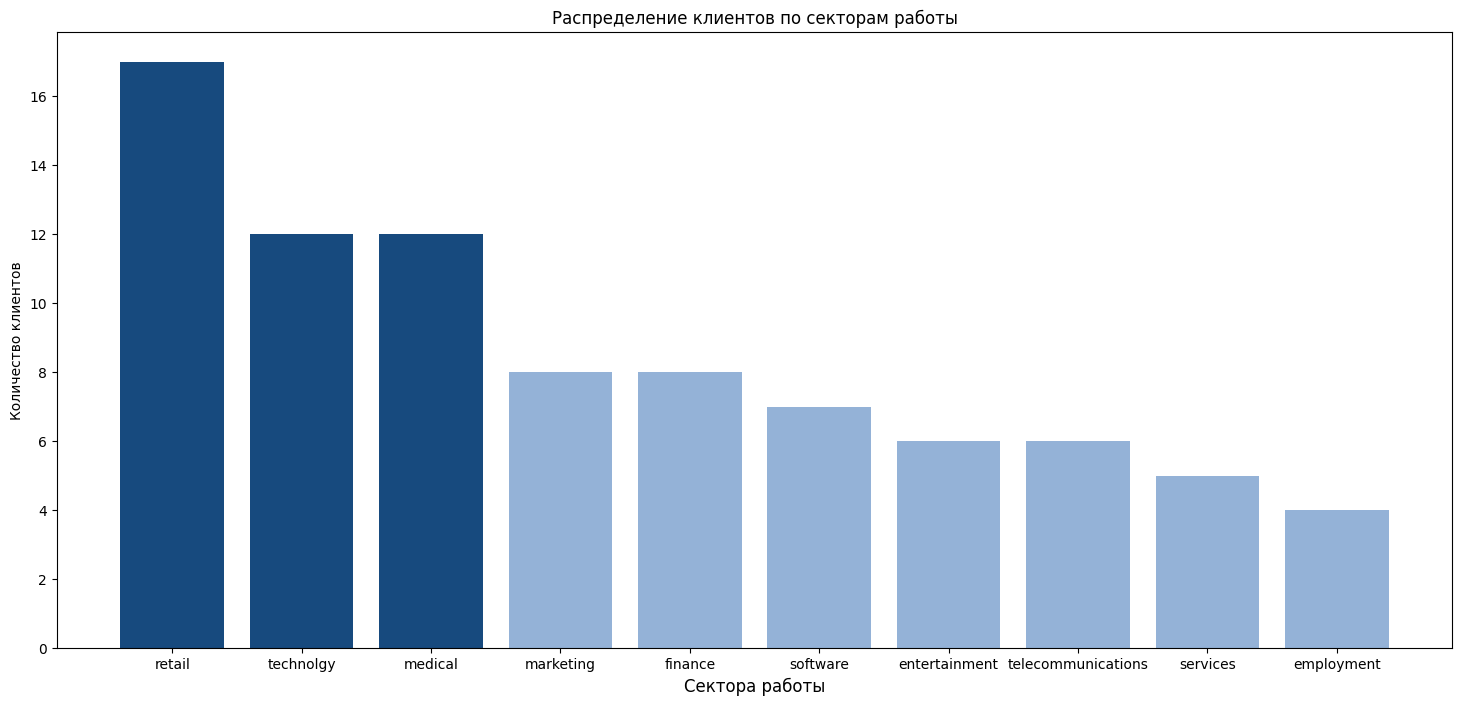

In [5]:
# Группировка данных по сектору работы и подсчет количества клиентов в каждом секторе
sector_counts = df['sector'].value_counts()

# Задача цвета
colors = ['#174A7E', '#174A7E', '#174A7E','#94B2D7','#94B2D7','#94B2D7','#94B2D7','#94B2D7','#94B2D7','#94B2D7']

# Создание графика
plt.figure(figsize=(18, 8))
plt.bar(sector_counts.index, sector_counts.values, color=colors)
plt.xlabel('Сектора работы', fontsize=12)
plt.ylabel('Количество клиентов')
plt.title('Распределение клиентов по секторам работы')

# Отображение графика
plt.show()

### Средня прибыль клиентов по секторам
Для создания данной диаграммы воспользуемся гистограммой (histogram)

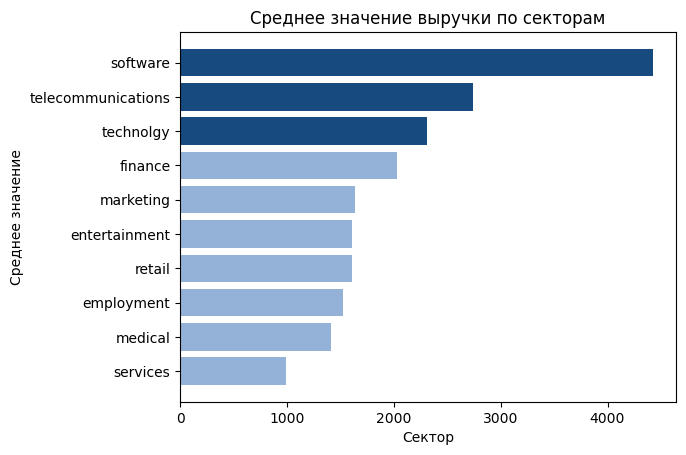

In [6]:
# Высчитывем среднее
avg_revenue = df.groupby('sector')['revenue'].mean().sort_values(ascending=True)

# Построение гистограммы
colors = ['#94B2D7','#94B2D7','#94B2D7','#94B2D7','#94B2D7','#94B2D7','#94B2D7', '#174A7E', '#174A7E', '#174A7E']
plt.barh(avg_revenue.index, avg_revenue.values, color=colors)


# Настройка осей и заголовка
plt.xlabel('Сектор')
plt.ylabel('Среднее значение')
plt.title('Среднее значение выручки по секторам')

# Отображение гистограммы
plt.show()

### Раброс выручки
Для отображения разброса выручки по секторам воспользуемся диаграммой "коробочек", т.к. на ней можно наблюдать средний интервал для сектора и предел разброса.

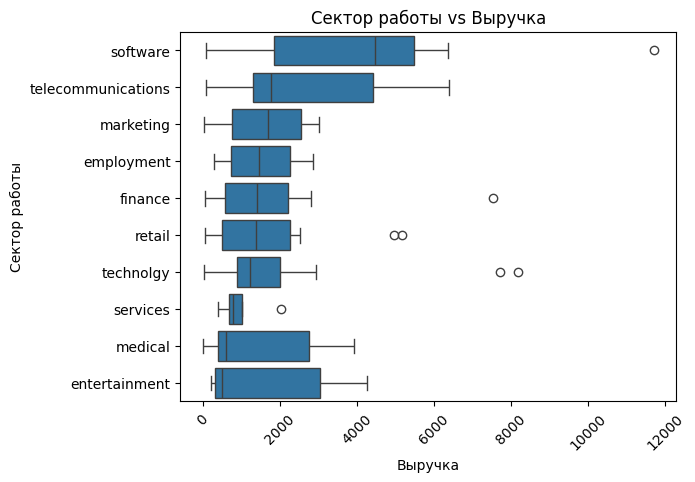

In [7]:
order = df.groupby('sector')['revenue'].median().sort_values(ascending=False).index

sns.boxplot(y=df['sector'], x=df['revenue'], order=order)
plt.ylabel('Сектор работы')
plt.xlabel('Выручка')
plt.title('Сектор работы vs Выручка')
plt.xticks(rotation=45)

plt.show()

### Лучшие клиенты
Далее нам необходимо отобразить топ-10 лучших клиентов с их долей в общем деле. Легче всего будет это сделать с помощью круговой диаграммы, так как она нагляднее всего показывает, какие именно партнёры наиболее выделяются из нашего списка.

Для начала отобразить это в виде таблицы:

In [8]:
top_10_revenue = df.nlargest(10, 'revenue')
top_10_revenue

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
41,Kan-code,software,1982,11698.03,34288,United States,NaN
35,Hottechi,technolgy,1997,8170.38,16499,Korea,NaN
43,Konex,technolgy,1980,7708.38,13756,United States,NaN
76,Xx-holding,finance,1993,7537.24,20293,United States,NaN
36,Initech,telecommunications,1994,6395.05,20275,United States,NaN
60,Scotfind,software,1996,6354.87,16780,United States,Bubba Gump
72,Treequote,telecommunications,1988,5266.09,8595,United States,Sonron
25,Ganjaflex,retail,1995,5158.71,17479,Japan,NaN
20,Fasehatice,retail,1990,4968.91,7523,United States,NaN
18,Dontechi,software,1982,4618.00,10083,United States,NaN


Далее отобразим эту информацию с помощью груговой диаграммы, выделяя топ-3 компании:

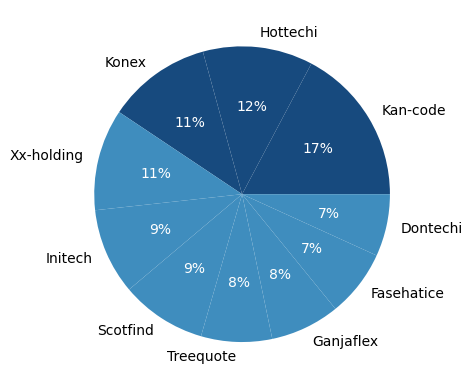

In [9]:
colors = ['#174A7E', '#174A7E', '#174A7E', '#3F8DBE', '#3F8DBE', '#3F8DBE', '#3F8DBE', '#3F8DBE', '#3F8DBE', '#3F8DBE']

labels_4 = top_10_revenue['account'].head(4)

_, _, text = plt.pie(top_10_revenue['revenue'], labels=top_10_revenue['account'], colors=colors, autopct='%1.0f%%')
plt.setp(text, color='white')

plt.show()


### Насколько важен год основания компании
Для показа связи между годом основания и выручкой воспользуемся графиком распределения

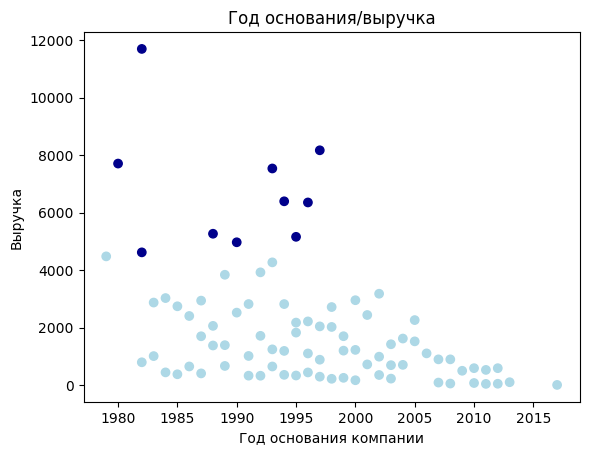

In [10]:
revenue = df['revenue']
colors = ['lightblue' if rev <= 4617 else 'darkblue' for rev in revenue]

plt.scatter(df['year_established'], revenue, c=colors)
plt.xlabel('Год основания компании')
plt.ylabel('Выручка')
plt.title('Год основания/выручка')

plt.show()

### Итоги истории
- Таким образом, в графиках мы рассмотрели наших клиентов.
- Как оказалось, ключевыми секторами с которыми мы взаимодействуем являются продажи, технологи и медицина
- При этом, наиболее выгодными и перспективными в плане объёма проектов являются компании, работающие в сеторах: разработки, телекоммуникаций, технологий
- Ключевыми нашими партнёрами являются: Kan-code, Hottechi, Konex, Xx-holding
- Все наши партнёры из ТОП-10 пришли на рынок раньше 2000 года